# Big data course 


Second seminar on network theory and applications.

# Network measures

Centrality measures for a given network are described in https://en.wikipedia.org/wiki/Centrality 

Examples of possible local measures: 
1. `degree_centrality(G)`, the degree centrality for nodes.
2. `in_degree_centrality(G)`, the in-degree centrality for nodes.
3. `out_degree_centrality(G)`, the out-degree centrality for nodes
4. `betweenness_centrality(G)`, the shortest-path betweenness centrality for nodes. Betweenness centrality of a node v is the sum of the fraction of all-pairs shortest paths that pass through 
5. ` closeness_centrality(G)`, closeness centrality for nodes.  Closeness centrality  of a node u is the reciprocal of the sum of the shortest path distances from u to all n-1 other nodes
6. `eigenvector_centrality(G)`,  the eigenvector centrality for the graph G. Eigenvector centrality computes the centrality for a node based on the centrality of its neighbors. The eigenvector centrality for node i is $x$: $Ax = \lambda x$, where $\lambda$ is eigenvalue.

Other network measures are described in the networkx documentation https://networkx.github.io/documentation/stable/reference/generators.html 

In [5]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline

# Network measures for given networks


## Algorithm for measures calculation and visualisation
1. Let us first generate a network using networkx standard networks.
2. Calculate measures for each node or link of a network
3. Plot a network with "nx.draw" https://networkx.github.io/documentation/stable/reference/drawing.html where each node has color according to the node measure
4. Plot a network degree sequence as diagram

**Tips:**
Be aware of the networkx classes, e.g. `dictionary`, `list` etc.

{0: 0.07142857142857142, 1: 0.14285714285714285, 2: 0.2857142857142857, 3: 0.07142857142857142, 4: 0.14285714285714285, 5: 0.2857142857142857, 6: 0.14285714285714285, 7: 0.14285714285714285, 8: 0.07142857142857142, 9: 0.07142857142857142, 10: 0.07142857142857142, 11: 0.21428571428571427, 12: 0.07142857142857142, 13: 0.14285714285714285, 14: 0.21428571428571427}
[(0, 1), (1, 2), (2, 4), (3, 1), (4, 2), (5, 4), (6, 2), (7, 2), (8, 1), (9, 1), (10, 1), (11, 3), (12, 1), (13, 2), (14, 3)]
<class 'networkx.classes.reportviews.DegreeView'>
[4, 4, 3, 3, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1]


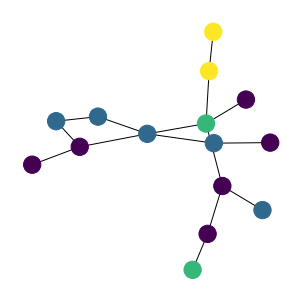

In [6]:
import networkx as nx
# 1. Generate a network
n=10
G = nx.star_graph(n)

n = 15 
k = 2
p = 0.5
G = nx.watts_strogatz_graph(n, k, p)

# 2. Calculate measures for each node
deg = nx.degree_centrality(G) # gives a dictionary!!!
print(deg)
print(G.degree())
print(type(G.degree))# gives 'networkx.classes.reportviews.DegreeView'
degree_sequence = sorted([d for n, d in G.degree()], reverse=True) # gives array of degree values
print(degree_sequence) 


# 3. Draw network with node colors defined by degree
plt.figure(figsize = (4, 4)) # set size of figure
node_color = degree_sequence # assign node colors
nx.draw(G, node_color = degree_sequence)



## Additional information to the plots
Now we add colorbars for plots.

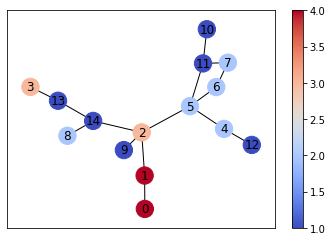

In [7]:
# we choose max and min degree for colorbars
vmin = min(degree_sequence) #.min() 
vmax = max(degree_sequence) # .max()
cmap = plt.cm.coolwarm

# we can choose another layouts: layout = nx.fruchterman_reingold_layout(G)


# we plot network with colorbars
nx.draw_networkx(G, node_color=degree_sequence,
                 cmap=cmap, vmin=vmin, vmax=vmax)
sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm.set_array([])
cbar = plt.colorbar(sm)



## Try to plot network measures for your network!

1. For a network of your choice try to find network measure which is meaningful.
2. Visualise network measures for a network of your choise.

In [8]:
import pandas as pd

quakers_edges = pd.read_csv('quakers_edgelist.csv')
quakers_nodes = pd.read_csv('quakers_nodelist.csv')

In [9]:
G = nx.from_pandas_edgelist(quakers_edges, source='Source', target='Target')
    
deg = nx.betweenness_centrality(G)
print(deg)
print(G.degree())
print(type(G.degree))# gives 'networkx.classes.reportviews.DegreeView'
degree_sequence = sorted([d for n, d in G.degree()], reverse=True) # gives array of degree values
print(degree_sequence) 


{'George Keith': 0.04500656400917155, 'Robert Barclay': 0.026944806605823553, 'Benjamin Furly': 0.06419626175167245, 'Anne Conway Viscountess Conway and Killultagh': 0.0, 'Franciscus Mercurius van Helmont': 0.0, 'William Penn': 0.23999456006192194, 'George Fox': 0.23683257726065213, 'George Whitehead': 0.12632024847366005, 'William Bradford': 0.000676034574339659, 'James Parnel': 0.0, 'Stephen Crisp': 0.00038509826645419866, 'Peter Collinson': 0.0, 'John Bartram': 0.0, 'James Logan': 0.026944806605823553, 'Joseph Wyeth': 0.0, 'Thomas Ellwood': 0.04619062388510455, 'Alexander Skene of Newtyle': 0.0, 'Lilias Skene': 0.0, 'Dorcas Erbery': 0.0, 'James Nayler': 0.1044602628044609, 'William Mucklow': 0.0, 'William Dewsbury': 0.0, 'Edward Burrough': 0.015338670858010271, 'John Crook': 0.00016297262059973924, 'John Audland': 0.041649363400775824, 'John Camm': 0.0017637259162682894, 'Francis Howgill': 0.014689610452322309, 'Edward Pyott': 0.0, 'Charles Marshall': 0.001404496319750557, 'Anne Cam

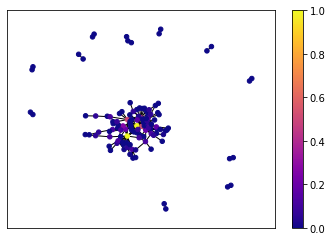

In [10]:
nx.draw_networkx(G, node_size=20, cmap=plt.cm.plasma, 
                                   node_color=list(deg.values()),
                                   nodelist=deg.keys(), with_labels=False)

sm = plt.cm.ScalarMappable(cmap=plt.cm.plasma)
sm.set_array([])
cbar = plt.colorbar(sm)
plt.show()

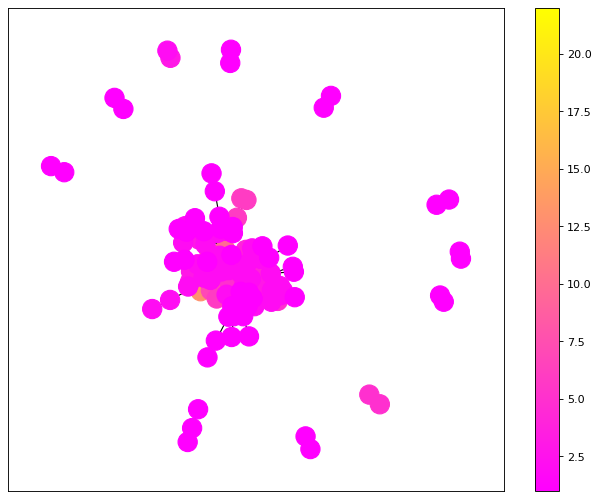

In [11]:
vmin = min(degree_sequence) #.min() 
vmax = max(degree_sequence) # .max()
cmap = plt.cm.spring

layout = nx.fruchterman_reingold_layout(G)

from matplotlib.pyplot import figure

figure(figsize=(10, 8), dpi=80)


# we plot network with colorbars
nx.draw_networkx(G, node_color=degree_sequence,
                 cmap=cmap, vmin=vmin, vmax=vmax,with_labels=False)
sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm.set_array([])
cbar = plt.colorbar(sm)

## Examples of network measures 

dict_values([0.023619233268356073, 0.03260086242542382, 0.0501210939807431, 0.002729044834307992, 0.03340126410301848, 0.05826687931951089, 0.005936558568137515, 0.014522417153996102, 0.024446216551479705, 0.05983371728985764, 0.05843818299958651, 0.010916179337231968, 0.02255006202374623, 0.042344497607655504, 0.05505050505050504, 0.09304743339831059, 0.04103609191328489, 0.048944119558154635, 0.10747829168881799, 0.010038986354775828])


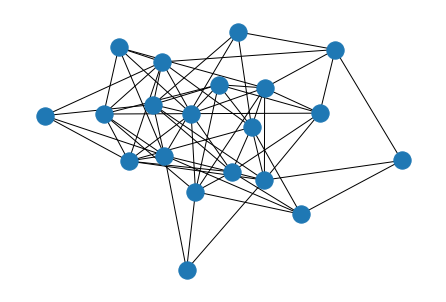

In [12]:
import networkx as nx

G_er = nx.erdos_renyi_graph(20, 0.3)
betw = nx.betweenness_centrality(G_er) #returns dictionary
betw_sequence = np.array(betw.values()) # gives array of degree values
 
print(betw_sequence)
nx.draw(G_er)
#nx.draw_networkx(G_er, node_color = betw_sequence)
plt.show()


# Global network measures 


In [13]:
nx.info(G_er)

<ipython-input-13-0f5e444f5edf>:1: DeprecationWarning: info is deprecated and will be removed in version 3.0.

  nx.info(G_er)


'Graph with 20 nodes and 65 edges'

## Analysis of a network with local measures
We plot the distributions (sorted values of local measures) for `degree`, `clustering`, `betweenness` and other measures. Please use other setups for the plotting the histograms. 

The networks are quite messy and full of links, therefore we perform some simple network analysis on them.
The structure of G can be analyzed using various graph-theoretic functions such as: linear ones (degree), non-linear ones (betweenness etc.)

In [13]:
import numpy as np
import seaborn


def measures_for_network(G):
    # -*- coding: utf-8 -*-
    
    print('drawing measures for graph')
    plt.hist(list(nx.degree_centrality(G).values()))
    plt.xlabel('normalized degree') #np.max(nx.degree_centrality(G_roads).values())*
    plt.ylabel('frequency')
    plt.show()
    
    seaborn.distplot(list(nx.degree_centrality(G).values()), bins=20)
    plt.xlabel('normalized degree') #np.max(nx.degree_centrality(G_roads).values())*
    plt.ylabel('frequency')
    plt.show()    
    
    
    seaborn.distplot(list(nx.betweenness_centrality(G).values()), bins=20)#plt.hist(list(nx.betweenness_centrality(G).values()))
    plt.xlabel('betweenness')
    plt.ylabel('frequency')
    plt.show()
    
    
    
    seaborn.distplot(list(nx.clustering(G).values()), bins=20)
    plt.xlabel('clustering')
    plt.ylabel('frequency')
    plt.show()
    
    
    
    plt.hist(list(nx.closeness_centrality(G).values()))
    plt.xlabel('closeness')
    plt.ylabel('frequency')
    plt.show()
    
    print('calculating global measures')
    
    print('average neighbor degree', nx.average_degree_connectivity(G))
    
    print('average neighbor degree', nx.average_neighbor_degree(G))
    
    print('average clustering')
    avclus = nx.average_clustering(G)
    #print(avclus)
    
    
    
    components = nx.connected_components(G)
    #print('components', components)
    #[[1, 2, 3], ['spam']]
    
    
    nx.clustering(G)
    #{1: 0.0, 2: 0.0, 3: 0.0, 'spam': 0.0}
    
    
    nx.degree(G)
    #Functions that return node properties return dictionaries keyed by node label. {1: 2, 2: 1, 3: 1, 'spam': 0}



drawing measures for graph


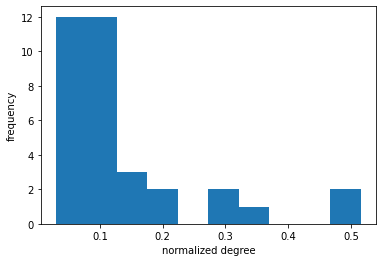

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


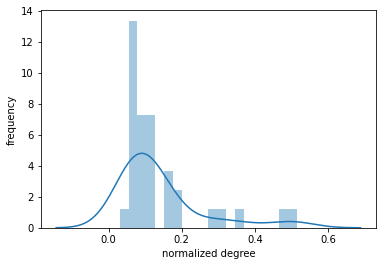

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


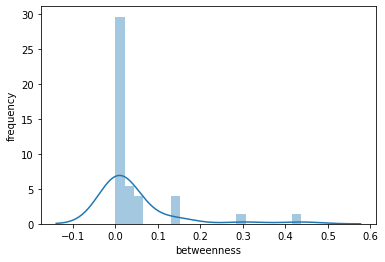

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


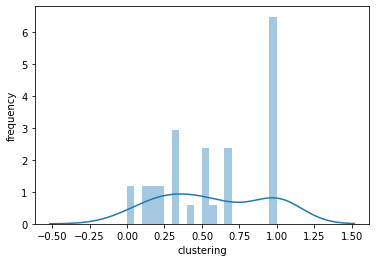

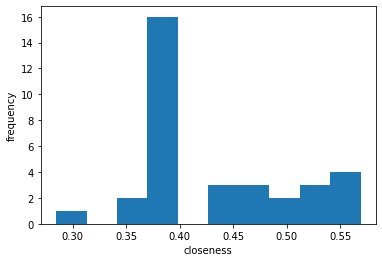

calculating global measures
average neighbor degree {16: 4.3125, 9: 5.777777777777778, 10: 6.6, 6: 8.333333333333334, 3: 8.222222222222221, 4: 8.541666666666666, 5: 10.466666666666667, 2: 12.409090909090908, 1: 16.0, 12: 5.083333333333333, 17: 3.823529411764706}
average neighbor degree {0: 4.3125, 1: 5.777777777777778, 2: 6.6, 3: 7.666666666666667, 4: 7.666666666666667, 5: 6.25, 6: 6.25, 7: 10.25, 8: 11.8, 9: 13.5, 10: 7.666666666666667, 11: 16.0, 12: 11.0, 13: 11.6, 14: 14.5, 15: 14.5, 16: 4.0, 17: 12.5, 18: 14.5, 19: 14.0, 20: 14.5, 21: 12.5, 22: 14.5, 23: 8.0, 24: 4.333333333333333, 25: 4.666666666666667, 26: 10.5, 27: 8.75, 28: 11.0, 29: 9.0, 30: 10.75, 31: 9.0, 32: 5.083333333333333, 33: 3.823529411764706}
average clustering
drawing measures for graph


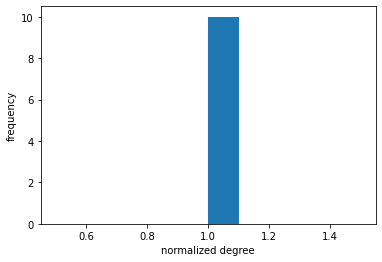

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


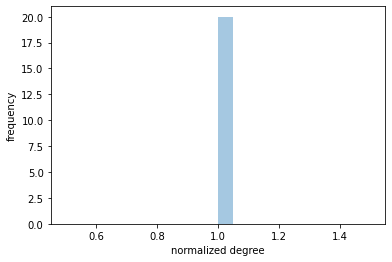

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


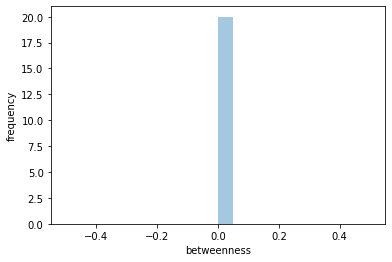

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


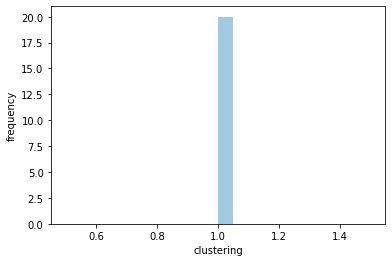

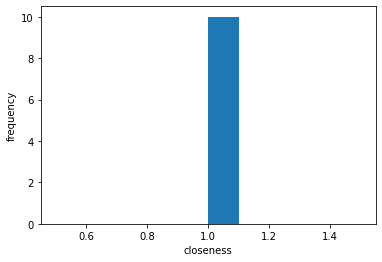

calculating global measures
average neighbor degree {9: 9.0}
average neighbor degree {0: 9.0, 1: 9.0, 2: 9.0, 3: 9.0, 4: 9.0, 5: 9.0, 6: 9.0, 7: 9.0, 8: 9.0, 9: 9.0}
average clustering


In [15]:
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline
from networkx.algorithms.community import greedy_modularity_communities

G = nx.karate_club_graph()

n = 10
Gc = nx.complete_graph(n)

measures_for_network(G)

measures_for_network(Gc)


## Community structure

The function `greedy_modularity_communities(G, weight=None)[source]`
finds communities in graph using Clauset-Newman-Moore greedy modularity maximization. This method currently supports the Graph class and does not consider edge weights.

In [16]:
import networkx as nx
from networkx.algorithms.community import greedy_modularity_communities

G = nx.karate_club_graph()
c = list(greedy_modularity_communities(G))
sorted(c[0])

[8, 14, 15, 18, 20, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33]

## Visualise community structure 
There are different algorithms for computing and visualising community strutures. Choose your favourite and try it out:



1. Communities structures 
https://networkx.github.io/documentation/latest/reference/algorithms/community.html
`K-Clique` to calculate k_clique_communities(G, k[, cliques]) - find k-clique communities in graph using the percolation method.
2. Modularity-based communities 
`greedy_modularity_communities`
https://networkx.github.io/documentation/latest/reference/algorithms/generated/networkx.algorithms.community.modularity_max.greedy_modularity_communities.html#networkx.algorithms.community.modularity_max.greedy_modularity_communities


In [17]:
from networkx.algorithms.community import k_clique_communities

G = nx.from_pandas_edgelist(quakers_edges, source='Source', target='Target')
K5 = nx.convert_node_labels_to_integers(G, first_label=3)
G.add_edges_from(K5.edges())
l = list(k_clique_communities(G, 3))
l


[frozenset({3,
            4,
            5,
            7,
            8,
            9,
            10,
            11,
            12,
            13,
            18,
            22,
            24,
            25,
            26,
            27,
            29,
            33,
            34,
            35,
            36,
            40,
            43,
            45,
            47,
            50,
            51,
            53,
            63,
            65,
            66}),
 frozenset({'Alexander Parker', 'Margaret Fell', 'Thomas Lawson'}),
 frozenset({8, 16, 91}),
 frozenset({14, 15, 16}),
 frozenset({'Anthony Pearson',
            'Benjamin Furly',
            'Edward Burrough',
            'Francis Howgill',
            'Franciscus Mercurius van Helmont',
            'George Fox',
            'George Keith',
            'George Whitehead',
            'Gervase Benson',
            'Hannah Stranger',
            'James Nayler',
            'James Parnel',
            'Jo

In [18]:
sorted(list(l[0]))

[3,
 4,
 5,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 18,
 22,
 24,
 25,
 26,
 27,
 29,
 33,
 34,
 35,
 36,
 40,
 43,
 45,
 47,
 50,
 51,
 53,
 63,
 65,
 66]

[[0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150, 160], [1, 11, 21, 31, 41, 51, 61, 71, 81, 91, 101, 111, 121, 131, 141, 151, 161], [2, 12, 22, 32, 42, 52, 62, 72, 82, 92, 102, 112, 122, 132, 142, 152, 162], [3, 13, 23, 33, 43, 53, 63, 73, 83, 93, 103, 113, 123, 133, 143, 153, 163], [4, 14, 24, 34, 44, 54, 64, 74, 84, 94, 104, 114, 124, 134, 144, 154, 164], [5, 15, 25, 35, 45, 55, 65, 75, 85, 95, 105, 115, 125, 135, 145, 155, 165], [6, 16, 26, 36, 46, 56, 66, 76, 86, 96, 106, 116, 126, 136, 146, 156, 166], [7, 17, 27, 37, 47, 57, 67, 77, 87, 97, 107, 117, 127, 137, 147, 157, 167], [8, 18, 28, 38, 48, 58, 68, 78, 88, 98, 108, 118, 128, 138, 148, 158, 168], [9, 19, 29, 39, 49, 59, 69, 79, 89, 99, 109, 119, 129, 139, 149, 159, 169]]


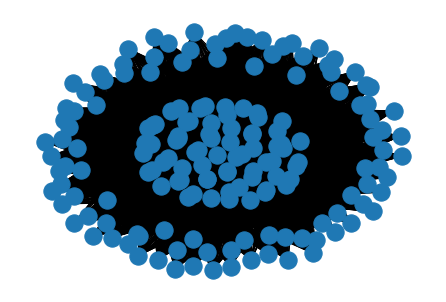

In [19]:
from networkx.algorithms.community import greedy_modularity_communities

G = nx.complete_bipartite_graph(70,100)

communities_generator = greedy_modularity_communities(G)
sorted(communities_generator[0])

print(sorted(map(sorted, communities_generator)))
nx.draw(G)
plt.show()

[[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16]]


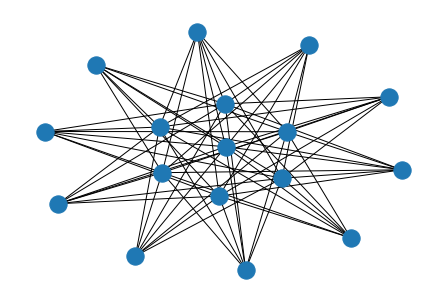

In [20]:
from networkx.algorithms.community import greedy_modularity_communities

G = nx.complete_bipartite_graph(7,10)

communities_generator = greedy_modularity_communities(G)
sorted(communities_generator[0])

print(sorted(map(sorted, communities_generator)))
nx.draw(G)
plt.show()



## Try to generate your own network and look at its measures
Create and analyze your own network using networkx library.


1. Generate a network
2. Get its adjacency matrix, edgelist of loaded network.
3. Then visualise this network with the simplest function "draw" 
4. Plot degree distribution and other measures
https://networkx.github.io/documentation/stable/reference/drawing.html


In [9]:
G = nx.karate_club_graph()


A = nx.adjacency_matrix(G)
A.todense()
#adj matrix doesnt work with this graph, why - had to upgrade networkx

array([[0, 4, 5, ..., 2, 0, 0],
       [4, 0, 6, ..., 0, 0, 0],
       [5, 6, 0, ..., 0, 2, 0],
       ...,
       [2, 0, 0, ..., 0, 4, 4],
       [0, 0, 2, ..., 4, 0, 5],
       [0, 0, 0, ..., 4, 5, 0]])

In [10]:
E = []
for line in nx.generate_edgelist(G, data=False):
  E.append(line)

E

['0 1',
 '0 2',
 '0 3',
 '0 4',
 '0 5',
 '0 6',
 '0 7',
 '0 8',
 '0 10',
 '0 11',
 '0 12',
 '0 13',
 '0 17',
 '0 19',
 '0 21',
 '0 31',
 '1 2',
 '1 3',
 '1 7',
 '1 13',
 '1 17',
 '1 19',
 '1 21',
 '1 30',
 '2 3',
 '2 7',
 '2 8',
 '2 9',
 '2 13',
 '2 27',
 '2 28',
 '2 32',
 '3 7',
 '3 12',
 '3 13',
 '4 6',
 '4 10',
 '5 6',
 '5 10',
 '5 16',
 '6 16',
 '8 30',
 '8 32',
 '8 33',
 '9 33',
 '13 33',
 '14 32',
 '14 33',
 '15 32',
 '15 33',
 '18 32',
 '18 33',
 '19 33',
 '20 32',
 '20 33',
 '22 32',
 '22 33',
 '23 25',
 '23 27',
 '23 29',
 '23 32',
 '23 33',
 '24 25',
 '24 27',
 '24 31',
 '25 31',
 '26 29',
 '26 33',
 '27 33',
 '28 31',
 '28 33',
 '29 32',
 '29 33',
 '30 32',
 '30 33',
 '31 32',
 '31 33',
 '32 33']

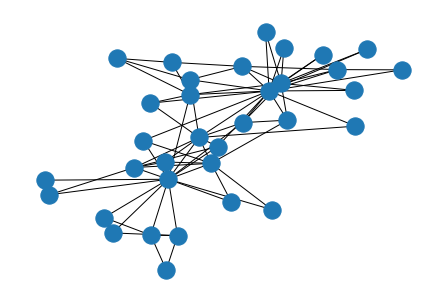

In [11]:
nx.draw(G)
plt.show()


drawing measures for graph


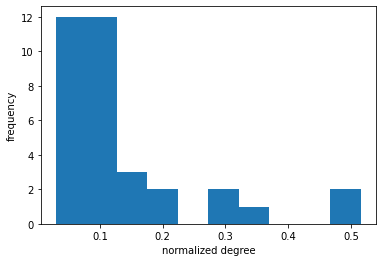

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


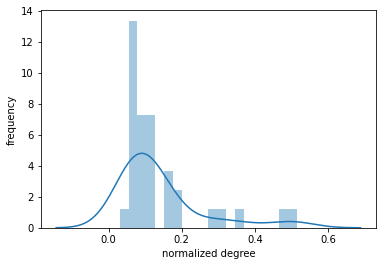

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


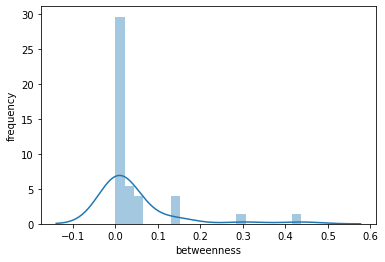

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


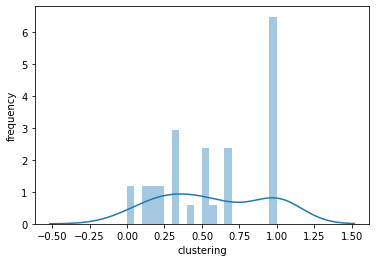

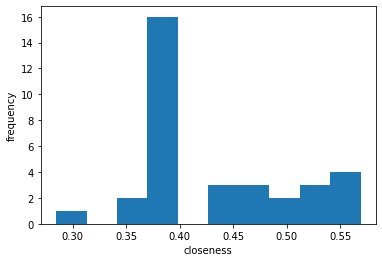

calculating global measures
average neighbor degree {16: 4.3125, 9: 5.777777777777778, 10: 6.6, 6: 8.333333333333334, 3: 8.222222222222221, 4: 8.541666666666666, 5: 10.466666666666667, 2: 12.409090909090908, 1: 16.0, 12: 5.083333333333333, 17: 3.823529411764706}
average neighbor degree {0: 4.3125, 1: 5.777777777777778, 2: 6.6, 3: 7.666666666666667, 4: 7.666666666666667, 5: 6.25, 6: 6.25, 7: 10.25, 8: 11.8, 9: 13.5, 10: 7.666666666666667, 11: 16.0, 12: 11.0, 13: 11.6, 14: 14.5, 15: 14.5, 16: 4.0, 17: 12.5, 18: 14.5, 19: 14.0, 20: 14.5, 21: 12.5, 22: 14.5, 23: 8.0, 24: 4.333333333333333, 25: 4.666666666666667, 26: 10.5, 27: 8.75, 28: 11.0, 29: 9.0, 30: 10.75, 31: 9.0, 32: 5.083333333333333, 33: 3.823529411764706}
average clustering


In [14]:
measures_for_network(G)

In [1]:
# pip install --upgrade scipy networkx

In [23]:
import networkx as nx
import matplotlib.pyplot as plt

G = nx.gnp_random_graph(10, 10)
A = nx.adjacency_matrix(G)
print(A.todense())

[[0 1 1 1 1 1 1 1 1 1]
 [1 0 1 1 1 1 1 1 1 1]
 [1 1 0 1 1 1 1 1 1 1]
 [1 1 1 0 1 1 1 1 1 1]
 [1 1 1 1 0 1 1 1 1 1]
 [1 1 1 1 1 0 1 1 1 1]
 [1 1 1 1 1 1 0 1 1 1]
 [1 1 1 1 1 1 1 0 1 1]
 [1 1 1 1 1 1 1 1 0 1]
 [1 1 1 1 1 1 1 1 1 0]]


In [24]:
E = []
for line in nx.generate_edgelist(G, data=False):
  E.append(line)

E

['0 1',
 '0 2',
 '0 3',
 '0 4',
 '0 5',
 '0 6',
 '0 7',
 '0 8',
 '0 9',
 '1 2',
 '1 3',
 '1 4',
 '1 5',
 '1 6',
 '1 7',
 '1 8',
 '1 9',
 '2 3',
 '2 4',
 '2 5',
 '2 6',
 '2 7',
 '2 8',
 '2 9',
 '3 4',
 '3 5',
 '3 6',
 '3 7',
 '3 8',
 '3 9',
 '4 5',
 '4 6',
 '4 7',
 '4 8',
 '4 9',
 '5 6',
 '5 7',
 '5 8',
 '5 9',
 '6 7',
 '6 8',
 '6 9',
 '7 8',
 '7 9',
 '8 9']

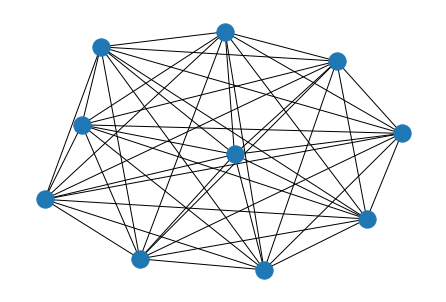

In [25]:
nx.draw(G)
plt.show()


drawing measures for graph


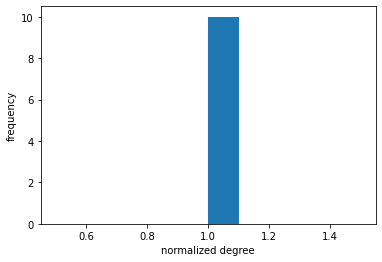

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


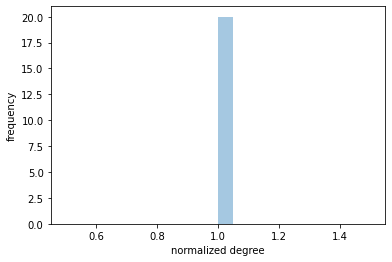

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


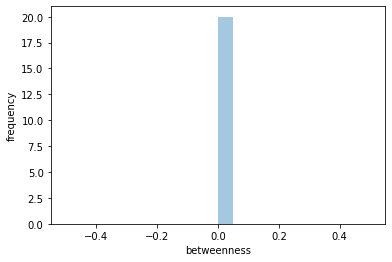

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


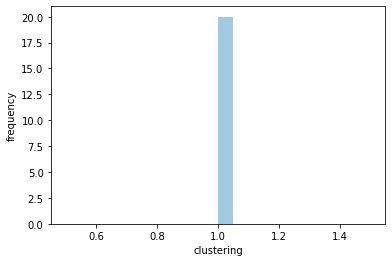

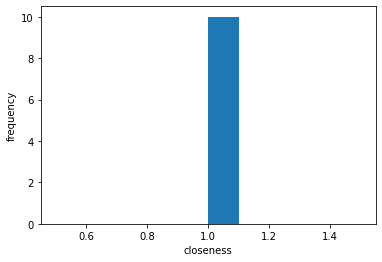

calculating global measures
average neighbor degree {9: 9.0}
average neighbor degree {0: 9.0, 1: 9.0, 2: 9.0, 3: 9.0, 4: 9.0, 5: 9.0, 6: 9.0, 7: 9.0, 8: 9.0, 9: 9.0}
average clustering


In [26]:
measures_for_network(G)